In [3]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV

In [4]:
# Load the dataset
file_path = '/mnt/data/placement-datasets2.csv'
df = pd.read_csv('placement-datasets2.csv')

In [5]:
# Data Preprocessing
df_clean = df.drop(['sl_no', 'salary'], axis=1)  # Drop irrelevant columns

# Encode categorical variables using LabelEncoder
label_encoders = {}
for column in ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status']:
    le = LabelEncoder()
    df_clean[column] = le.fit_transform(df_clean[column])
    label_encoders[column] = le

In [6]:
# Split data into features and target
X = df_clean.drop('status', axis=1)
y = df_clean['status']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

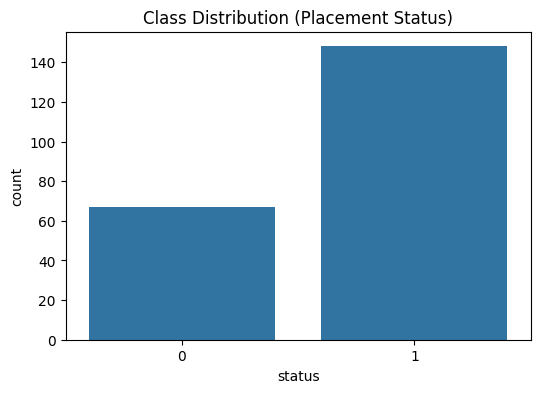

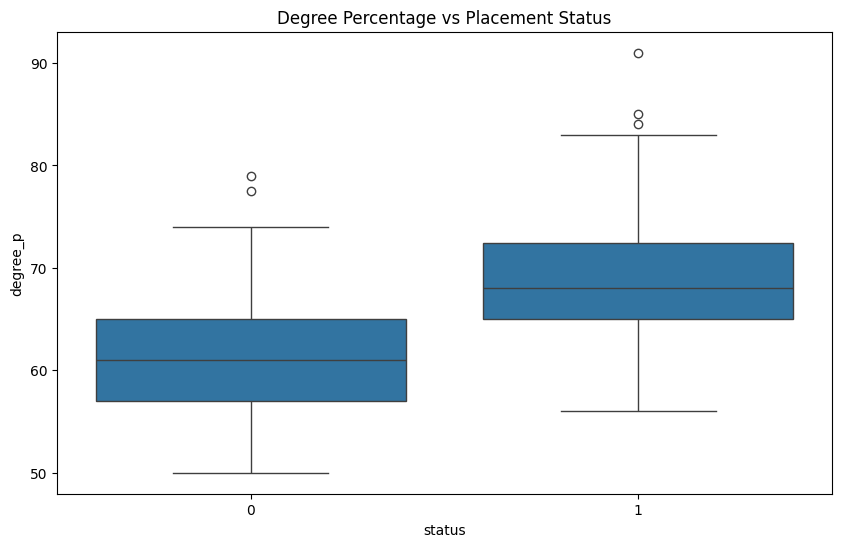

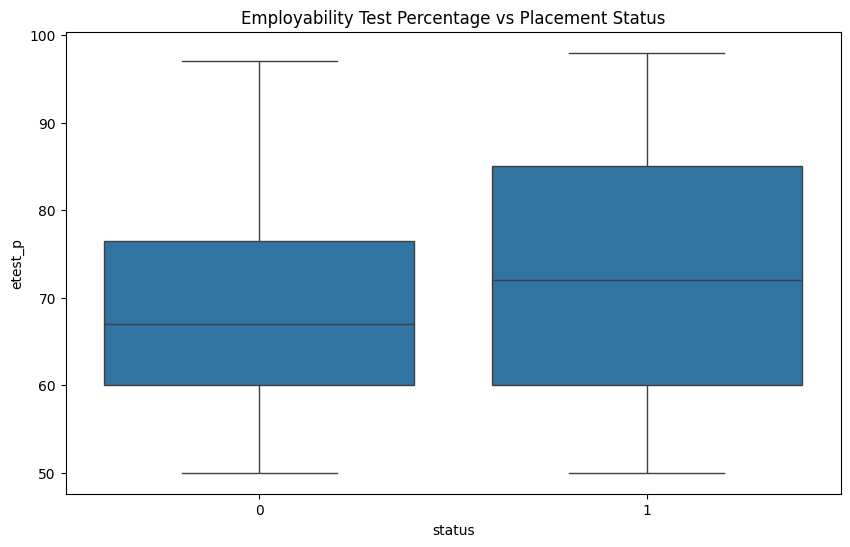

In [7]:
# Exploratory Data Analysis (EDA)
# Plot class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=y)
plt.title('Class Distribution (Placement Status)')
plt.show()

# Plot feature relationships with target
plt.figure(figsize=(10, 6))
sns.boxplot(x=y, y=df_clean['degree_p'])
plt.title('Degree Percentage vs Placement Status')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=y, y=df_clean['etest_p'])
plt.title('Employability Test Percentage vs Placement Status')
plt.show()

In [8]:
# Model Building: Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

In [9]:
# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 79.07%


Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.50      0.57        12
           1       0.82      0.90      0.86        31

    accuracy                           0.79        43
   macro avg       0.75      0.70      0.72        43
weighted avg       0.78      0.79      0.78        43



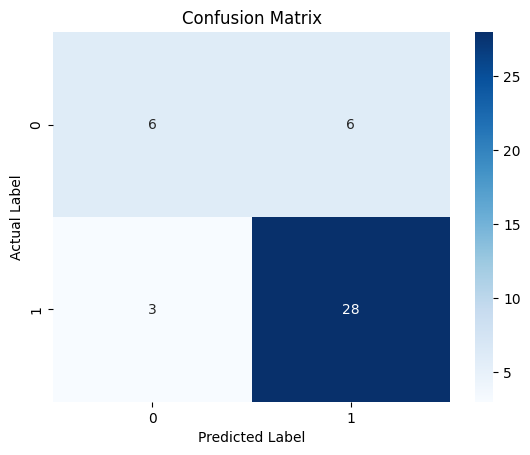

In [10]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [11]:
# Hyperparameter Tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters and accuracy after tuning
print("Best Parameters:", grid_search.best_params_)
best_rf_classifier = grid_search.best_estimator_

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}


In [12]:
# Evaluate with the best parameters
y_pred_best = best_rf_classifier.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Accuracy after tuning: {accuracy_best * 100:.2f}%")


Accuracy after tuning: 81.40%
